# Series2Graph++ GutenTAG Experiments

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

## Load Data

In [3]:
results_directory = Path("../results")
data_directory = Path("../data")
experiment_name = "gutentag"

results = pd.read_csv(results_directory /experiment_name / "results.csv")

### Repair results (for GutenTAG only)

In [4]:
import yaml

In [5]:
with (data_directory / "GutenTAG" / "overview.yaml").open("r") as f:
    overview = yaml.load(f, Loader=yaml.FullLoader)

for ts in overview.get("generated-timeseries", []):
    channels = ts["channels"]
    algo_input_dimensionality = "UNIVARIATE" if channels == 1 else "MULTIVARIATE"
    name = ts["name"]
    results.loc[results["dataset"].str.contains(name), "algo_input_dimensionality"] = algo_input_dimensionality

## Errors

In [23]:
results[results.status == "ERROR"]

,algorithm,collection,dataset,algo_training_type,algo_input_dimensionality,dataset_training_type,dataset_input_dimensionality,train_preprocess_time,train_main_time,execute_preprocess_time,...,execute_postprocess_time,status,error_message,repetition,hyper_params,hyper_params_id,ROC_AUC,PR_AUC,RANGE_PR_AUC,AVERAGE_PRECISION
151,Series2Graph++,GutenTAG,sinus-combined-diff-1.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
153,Series2Graph++,GutenTAG,sinus-combined-diff-3.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 6, ""pattern-length"": 20, ""query-len...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
154,Series2Graph++,GutenTAG,sinus-diff-count-1.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
155,Series2Graph++,GutenTAG,sinus-diff-count-2.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
156,Series2Graph++,GutenTAG,sinus-diff-count-3.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
157,Series2Graph++,GutenTAG,sinus-diff-count-4.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
158,Series2Graph++,GutenTAG,sinus-diff-count-5.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
159,Series2Graph++,GutenTAG,sinus-diff-count-6.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
160,Series2Graph++,GutenTAG,sinus-diff-count-7.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN
161,Series2Graph++,GutenTAG,sinus-diff-count-8.unsupervised,UNSUPERVISED,UNIVARIATE,UNSUPERVISED,UNIVARIATE,NaN,NaN,NaN,...,NaN,ERROR,DockerAlgorithmFailedError('Please consider lo...,1,"{""latent"": 14, ""pattern-length"": 43, ""query-le...",29c1d275507e287f516260eaae758bed,NaN,NaN,NaN,NaN


In [26]:
results = results[results.status == "OK"]

## Helper Functions

In [27]:
from typing import Iterable, Tuple, List

In [28]:
def get_score(dataset: str, collection="GutenTAG", algorithm="Series2Graph++", repetition=1) -> np.ndarray:
    directory = results_directory / experiment_name
    for path in directory.glob(algorithm + "/*/" + collection):
        return np.genfromtxt(path / dataset / str(repetition) / "anomaly_scores.ts")

In [29]:
def list_datasets(collection="GutenTAG", algorithm="Series2Graph++") -> Iterable[Tuple[str, Path]]:
    directory = results_directory / experiment_name
    for path in directory.glob(algorithm + "/*/" + collection):
        for dataset in path.iterdir():
            yield dataset.name, dataset

In [30]:
def plot_score(dataset: str, collection="GutenTAG", algorithm="Series2Graph++", repetition=1):
    score = get_score(dataset, collection, algorithm, repetition)
    plt.plot(score)

In [31]:
def extract_dataset_path(dataset: str, collection="GutenTAG", execution_type="test") -> Path:
    dataset, learning_type = dataset.split(".")
    directory = data_directory / collection / dataset
    return directory / (execution_type + ".csv")

In [32]:
def get_timeseries(dataset: str, collection="GutenTAG") -> pd.DataFrame:
    path = extract_dataset_path(dataset, collection)
    return pd.read_csv(path)

In [33]:
def plot_timeseries(dataset: str, collection="GutenTAG"):
    ts = get_timeseries(dataset, collection)
    ts.iloc[:, 1:-1].plot()

In [34]:
def gr(**kwargs) -> pd.DataFrame:
    filters = [results[k] == v for k, v in kwargs.items()]
    tmp_res = results.copy()
    for f in filters:
        tmp_res = tmp_res[f]
    return tmp_res

In [35]:
def get_all_anomaly_types() -> List[str]:
    types = set()
    for ts in overview.get("generated-timeseries", []):
        for a in ts.get("anomalies", []):
            for k in a.get("kinds", []):
                types.add(k.get("kind"))
    return list(types)

In [36]:
def get_anomaly_type_datasets(atype) -> List[str]:
    names = set()
    for ts in overview.get("generated-timeseries", []):
        for a in ts.get("anomalies", []):
            for k in a.get("kinds", []):
                if atype == k.get("kind"):
                    names.add(ts.get("name"))
    return list(names)

In [37]:
def get_channels_from_dataset(dataset) -> int:
    for ts in overview.get("generated-timeseries", []):
        if dataset == ts.get("name"):
            return ts.get("channels")

## Evaluation

### Overall

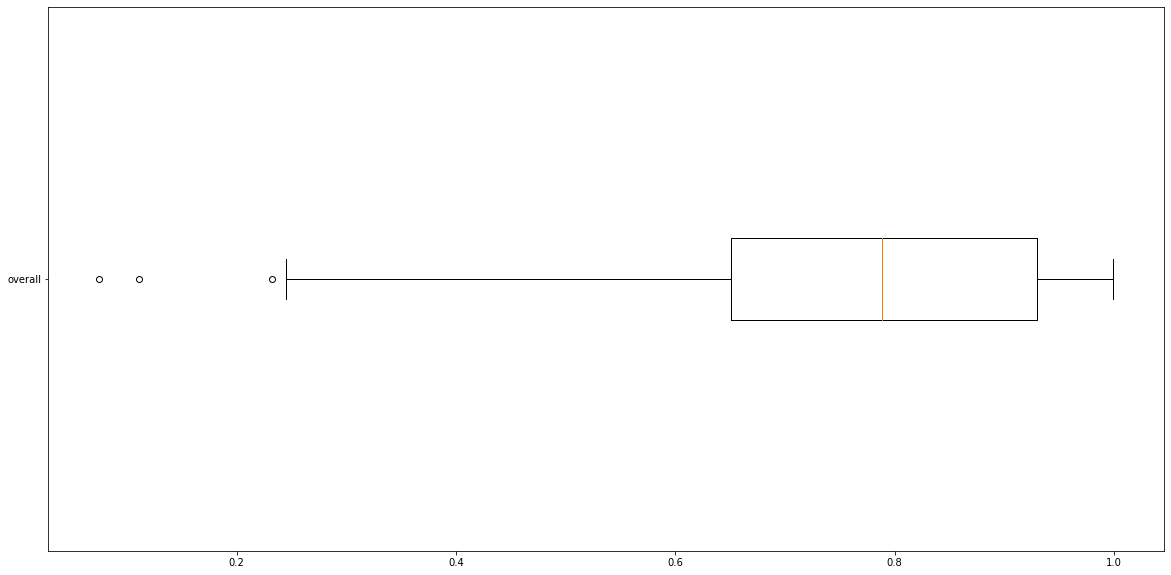

In [51]:
f, ax = plt.subplots(1, 1, sharex=True)
ax.boxplot(results.ROC_AUC.values, vert=False)
ax.set_yticklabels(["overall"])
plt.show()

### Univariate

In [54]:
tmp_res = gr(algo_input_dimensionality="UNIVARIATE")
tmp_res.loc[:, "base_oscillation"] = tmp_res["dataset"].apply(lambda d: d.split("-")[0])
tmp_res.loc[:, "dataset_name"] = tmp_res.dataset.apply(lambda x: x.split(".")[0])

for atype in get_all_anomaly_types():
    datasets = get_anomaly_type_datasets(atype)
    tmp_res.loc[tmp_res.dataset_name.isin(datasets), "anomaly_type"] = atype

#### Overall

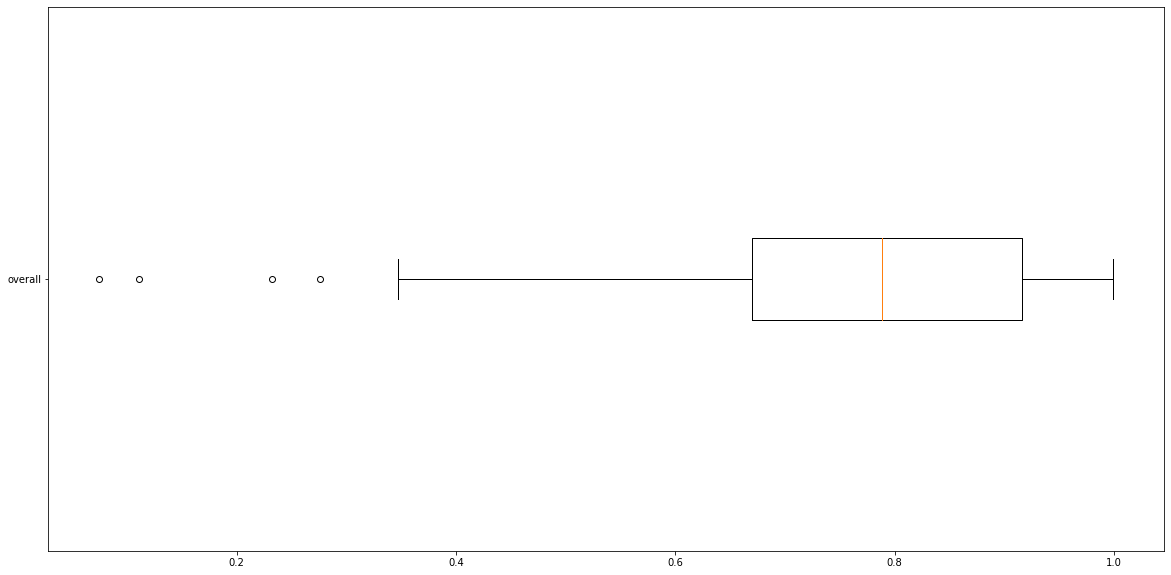

In [55]:
f, ax = plt.subplots(1, 1, sharex=True)
ax.boxplot(tmp_res.ROC_AUC.values, vert=False)
ax.set_yticklabels(["overall"])
plt.show()

#### Base Oscillations

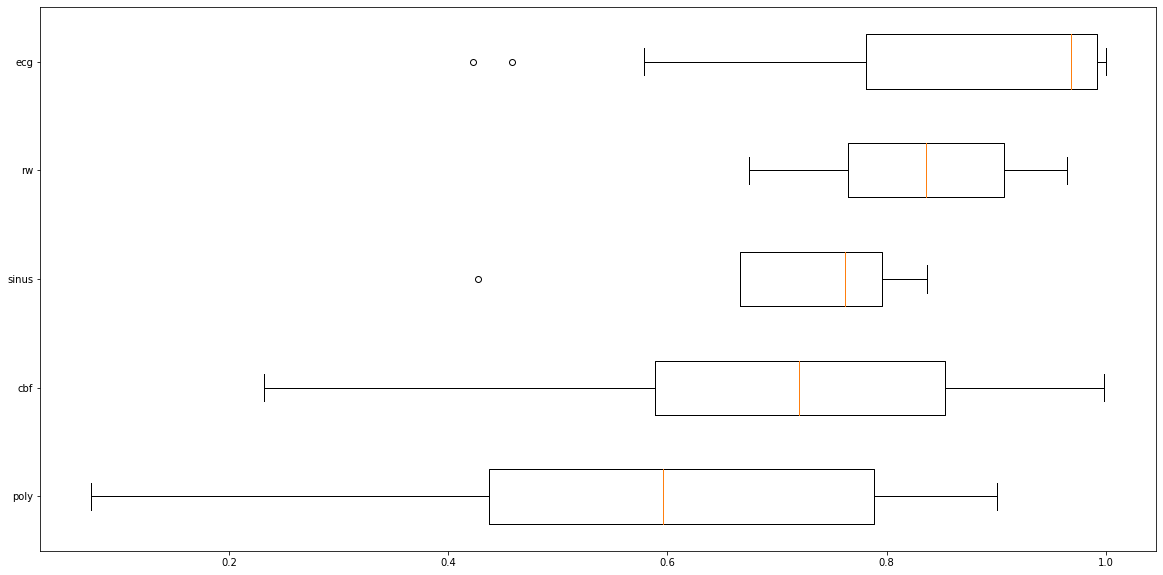

In [56]:
bo_group = tmp_res.groupby("base_oscillation")["ROC_AUC"]

f, ax = plt.subplots(1, 1, sharex=True)

values = []
names = []

for group_name, ids in bo_group.groups.items():
    values.append(tmp_res.loc[ids].ROC_AUC.values)
    names.append(group_name)
    
values, names = zip(*sorted(zip(values, names), key=lambda x: np.median(x[0])))
    
ax.boxplot(values, vert=False)
ax.set_yticklabels(names)
plt.show()

#### Anomaly Types

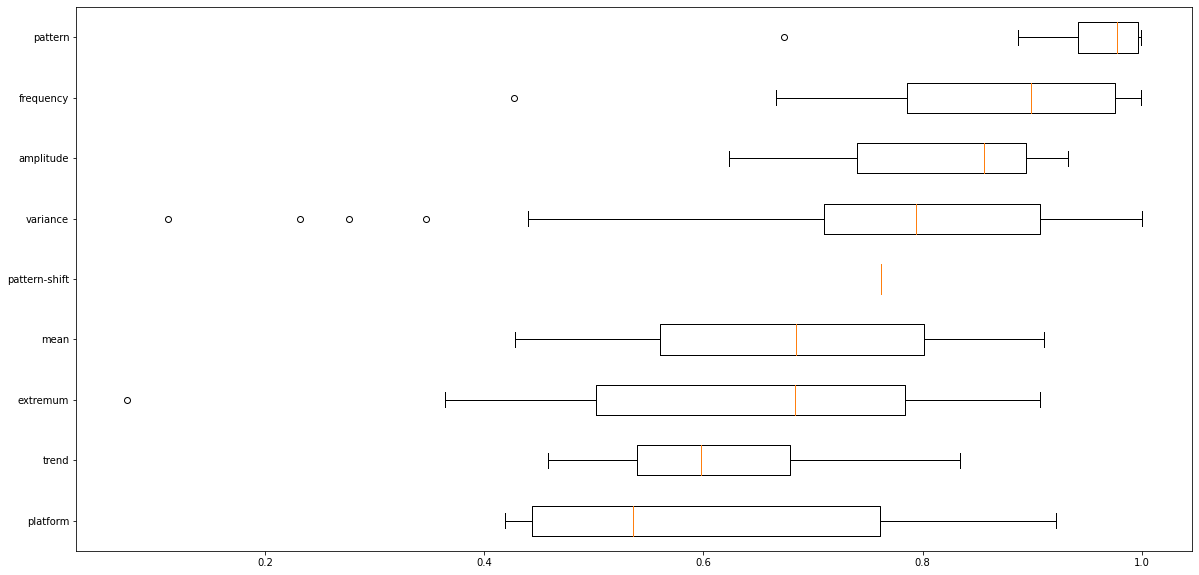

In [61]:
tmp_tmp_res = tmp_res

at_group = tmp_tmp_res.groupby("anomaly_type")["ROC_AUC"]

f, ax = plt.subplots(1, 1, sharex=True)

values = []
names = []

for group_name, ids in at_group.groups.items():
    values.append(tmp_res.loc[ids].ROC_AUC.values)
    names.append(group_name)

values, names = zip(*sorted(zip(values, names), key=lambda x: np.median(x[0])))
    
ax.boxplot(values, vert=False)
ax.set_yticklabels(names)
plt.show()

### Multivariate

In [43]:
tmp_res = gr(algo_input_dimensionality="MULTIVARIATE")
tmp_res.loc[:, "base_oscillation"] = tmp_res["dataset"].apply(lambda d: d.split("-")[0])
tmp_res.loc[:, "dataset_name"] = tmp_res.dataset.apply(lambda x: x.split(".")[0])

for atype in get_all_anomaly_types():
    datasets = get_anomaly_type_datasets(atype)
    tmp_res.loc[tmp_res.dataset_name.isin(datasets), "anomaly_type"] = atype

tmp_res.loc[:, "channels"] = tmp_res.dataset_name.apply(get_channels_from_dataset)

#### Overall

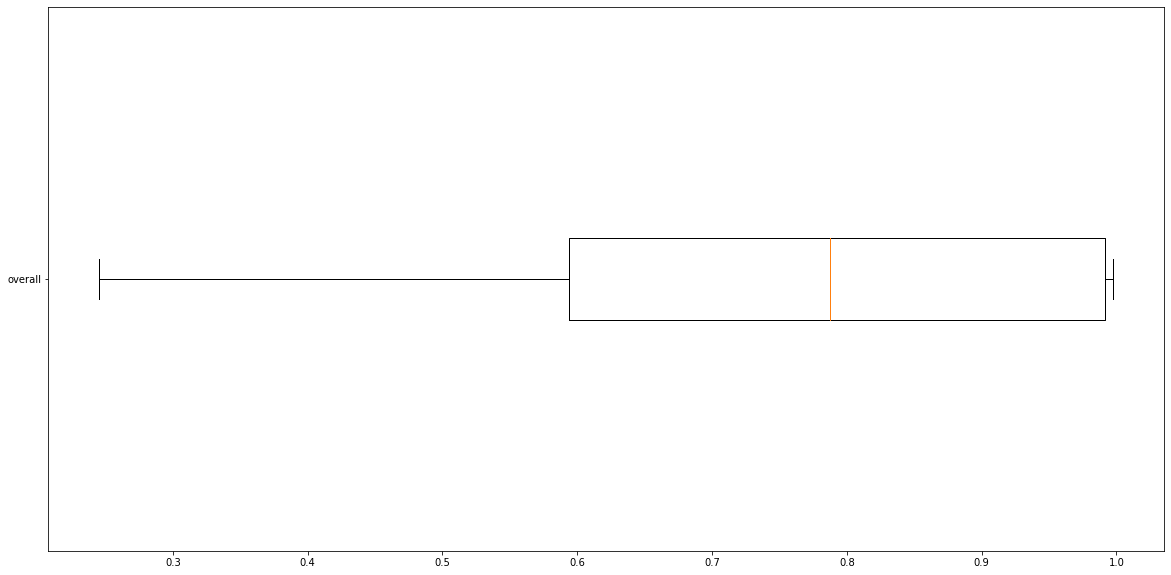

In [44]:
f, ax = plt.subplots(1, 1, sharex=True)
ax.boxplot(tmp_res.ROC_AUC.values, vert=False)
ax.set_yticklabels(["overall"])
plt.show()

#### Base Oscillations

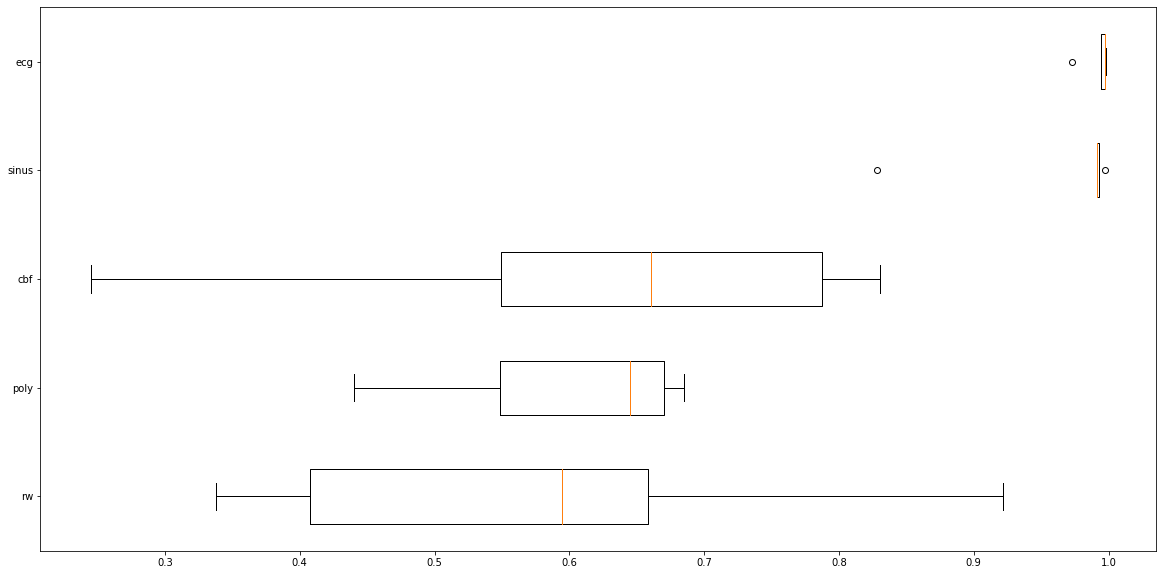

In [45]:
bo_group = tmp_res.groupby("base_oscillation")["ROC_AUC"]

f, ax = plt.subplots(1, 1, sharex=True)

values = []
names = []

for group_name, ids in bo_group.groups.items():
    values.append(tmp_res.loc[ids].ROC_AUC.values)
    names.append(group_name)
    
values, names = zip(*sorted(zip(values, names), key=lambda x: np.median(x[0])))
    
ax.boxplot(values, vert=False)
ax.set_yticklabels(names)
plt.show()

#### Anomaly Types

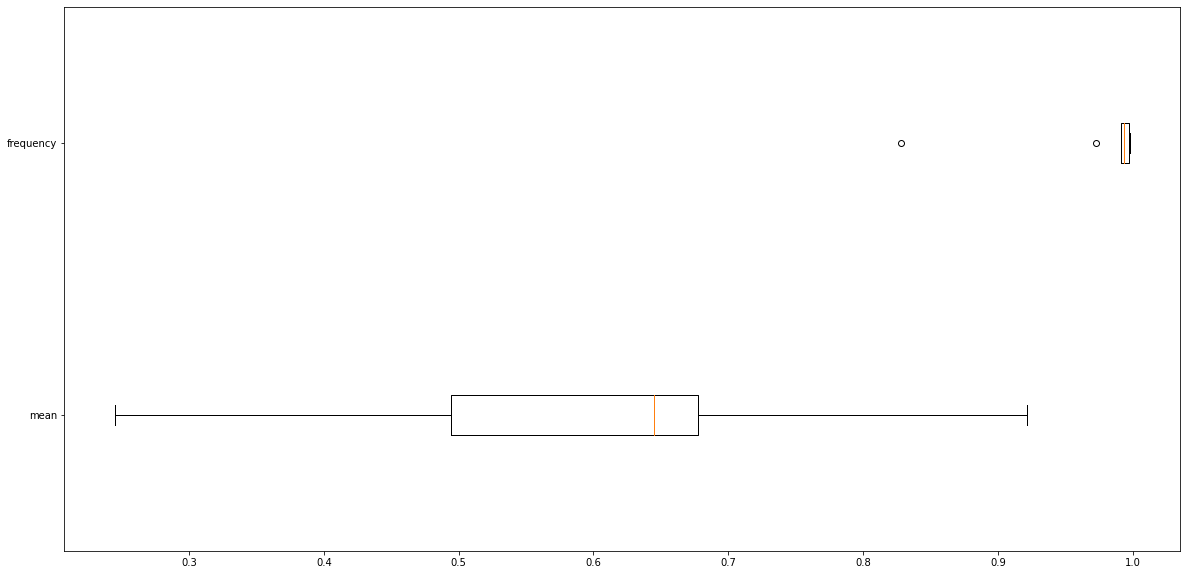

In [46]:
at_group = tmp_res.groupby("anomaly_type")["ROC_AUC"]

f, ax = plt.subplots(1, 1, sharex=True)

values = []
names = []

for group_name, ids in at_group.groups.items():
    values.append(tmp_res.loc[ids].ROC_AUC.values)
    names.append(group_name)

values, names = zip(*sorted(zip(values, names), key=lambda x: np.median(x[0])))
    
ax.boxplot(values, vert=False)
ax.set_yticklabels(names)
plt.show()

#### Channels

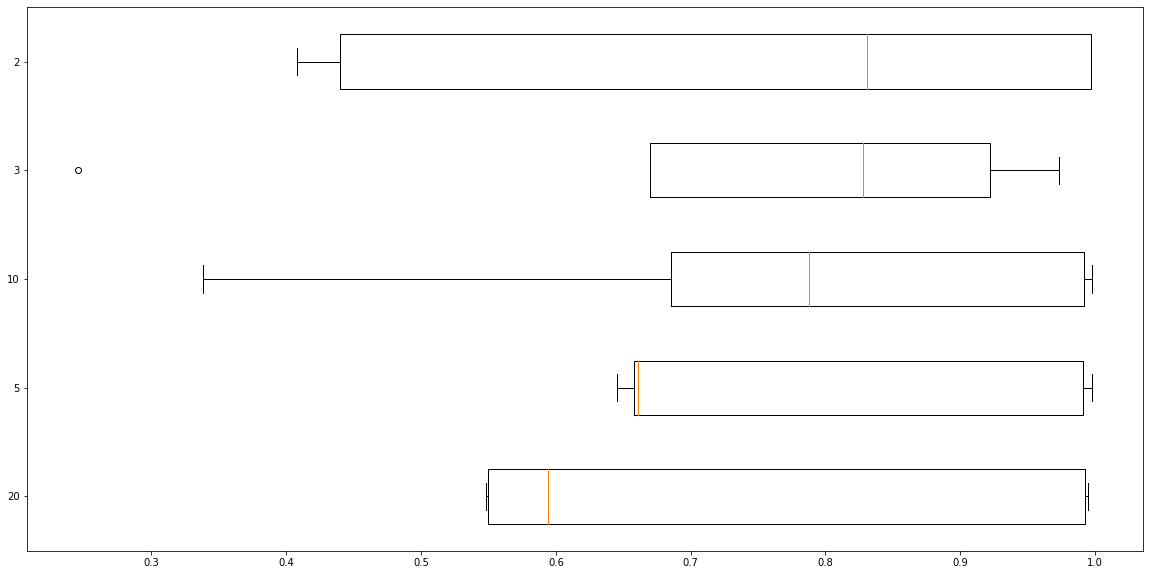

In [47]:
c_group = tmp_res.groupby("channels")

f, ax = plt.subplots(1, 1, sharex=True)

values = []
names = []

for group_name, ids in c_group.groups.items():
    values.append(tmp_res.loc[ids].ROC_AUC.values)
    names.append(group_name)

values, names = zip(*sorted(zip(values, names), key=lambda x: np.median(x[0])))
    
ax.boxplot(values, vert=False)
ax.set_yticklabels(names)
plt.show()

### Time

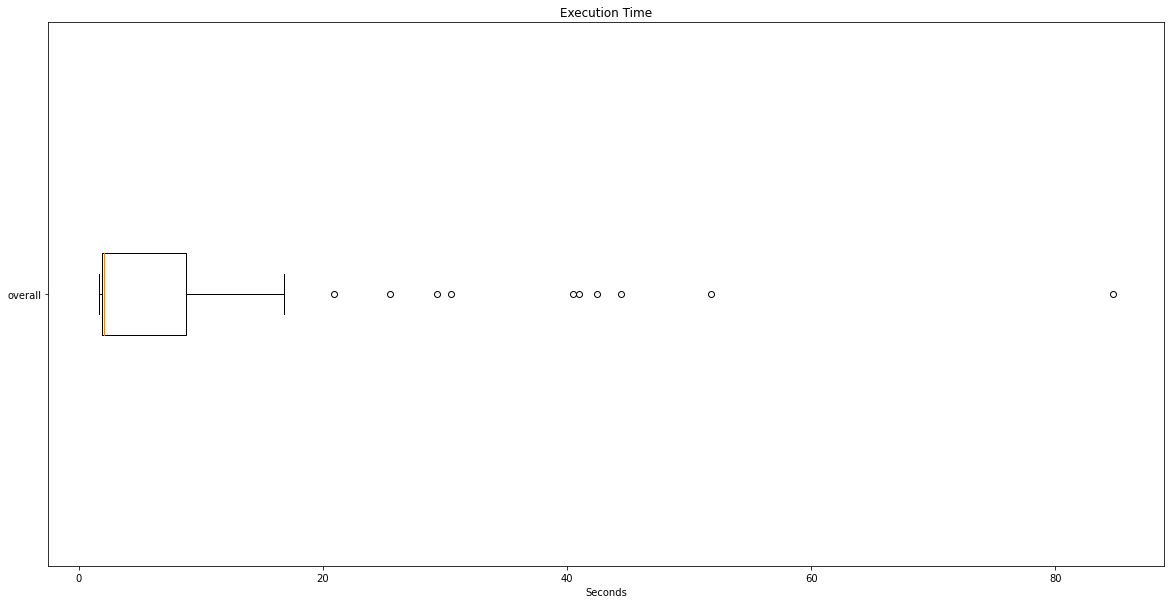

In [48]:
f, ax = plt.subplots(1, 1, sharex=True)
ax.boxplot(results.execute_main_time.values, vert=False)
ax.set_yticklabels(["overall"])
plt.title("Execution Time")
plt.xlabel("Seconds")
plt.show()

## Exploration

(0.0, 100.0)

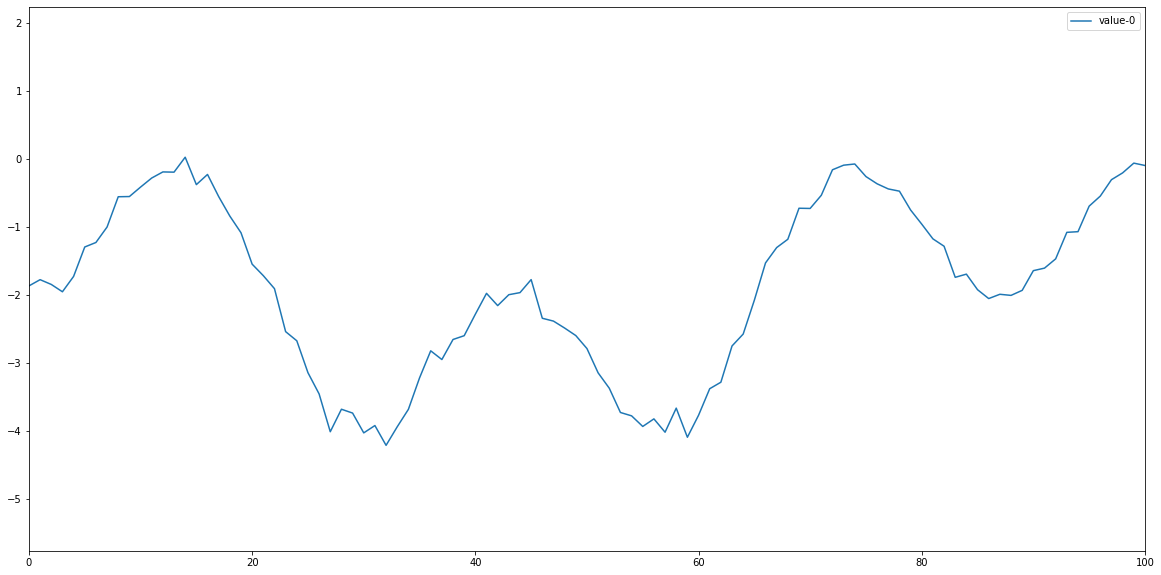

In [50]:
plot_timeseries("sinus-combined-diff-1.unsupervised")
plt.xlim(0, 100)